# Equilibration of FOCI-OpenIFS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cmocean 
from scipy.stats import linregress
import foci_functions 

In [2]:
from dask.distributed import Client, LocalCluster, wait

In [3]:
cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit=64e9,
                       silence_logs=50)
client = Client(address=cluster)

In [4]:
client

Client Scheduler: tcp://127.0.0.1:46059 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 238.42 GiB


In [5]:
#machine = 'nesh'
#
#if machine == 'sci':
#    esmdir = '/data/user/jkjellsson/esm-experiments/focioifs/'
#    nemo_mesh = '/data/user/jkjellsson/orca05_mesh_mask.nc'
#elif machine == 'nesh':
#    esmdir2 = '/gxfs_work1/geomar/smomw352/esm-slask/'
#    esmdir = '/gxfs_work1/geomar/smomw352/esm-experiments/'
#    nemo_mesh = '/gxfs_work1/geomar/smomw352/orca05_mesh_mask.nc'

In [6]:
# NEMO mesh
#ds_mesh = xr.open_dataset(nemo_mesh)
#da_orca05_area = (ds_mesh['e1t'] * ds_mesh['e2t']).sel(t=0)
#da_orca05_mask = ds_mesh['tmask'].sel(t=0,z=0)

# Read data

In [7]:
exp_list = ['FOCI_GJK029']
time_list = [slice('1850-01-01','2550-01-01')]

In [8]:
#from importlib import reload

In [9]:
#foci_functions = reload(foci_functions)

In [10]:
ds_top_1y = foci_functions.read_nemo(exp_list, time_list, 
                                     grid='ptrc_T',freq='1y', 
                                     decode_timedelta=False)

/gxfs_work1/geomar/smomw352/esm-experiments//FOCI_GJK029/outdata/nemo/ym/FOCI_GJK029*1y*ptrc_T.nc


In [11]:
## NEMO TOP
#ds_top_all = []
#for exp in exp_list:
#    
#    chunks = {'x':None, 'y':None, 'deptht': None, 'time_counter': 1} 
#    
#    top = '%s/%s/outdata/nemo/1y/*1y*ptrc_T.nc' % (esmdir,exp)
#    ds_top = xr.open_mfdataset(top,combine='nested', 
#                               concat_dim="time_counter", chunks=chunks,
#                               decode_timedelta=False,
#                               data_vars='minimal', coords='minimal', compat='override',
#                               parallel=True).rename({'time_counter':'time', 'nav_lat':'lat', 'nav_lon':'lon'})
#    ds_top_all.append(ds_top)

In [12]:
ds_top_1y[0]

<xarray.Dataset>
Dimensions:            (deptht: 46, time: 700, bnds: 2, y: 511, x: 722)
Coordinates:
  * deptht             (deptht) float64 3.047 9.454 ... 5.625e+03 5.875e+03
  * time               (time) object 1850-07-01 06:00:00 ... 2549-07-01 06:00:00
    nav_lon            (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lat            (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
Dimensions without coordinates: bnds, y, x
Data variables:
    time_counter_bnds  (time, bnds) object dask.array<chunksize=(10, 2), meta=np.ndarray>
    deptht_bnds        (deptht, bnds) float32 dask.array<chunksize=(46, 2), meta=np.ndarray>
    votrcage           (time, deptht, y, x) float32 dask.array<chunksize=(10, 46, 511, 722), meta=np.ndarray>
    tarea              (y, x) float64 1.562e+08 1.562e+08 ... 2.708e+05
    uarea              (y, x) float64 1.562e+08 1.562e+08 ... 8.078e+06
    varea              (y, x) float64 1.575e+08 1.575e+08 ... 1.334e+06
    e1t                (y, x) float64 ...
    e2t                (y, x) float64 ...
    tvolume            (y, x, deptht) float64 9.669e+08 1.037e+09 ... 6.779e+07
    tmask              (deptht, y, x) int8 ...
    umask              (deptht, y, x) int8 ...
    vmask              (deptht, y, x) int8 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         ../../outdata/nemo/FOCI_GJK029_1m_18500101_18591231_ptrc_T
    description:  transient tracers
    title:        transient tracers
    timeStamp:    2023-Feb-19 13:41:05 GMT
    uuid:         f5297548-8be6-4b44-81cf-b05866b5f85b
    history:      Mon Feb 20 11:38:26 2023: ncks -7 --no-alphabetize -L 1 --c...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    frequency:    year
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [13]:
ds_top = xr.concat(ds_top_1y, dim='time')

In [14]:
ds_top

<xarray.Dataset>
Dimensions:            (deptht: 46, time: 700, bnds: 2, y: 511, x: 722)
Coordinates:
  * deptht             (deptht) float64 3.047 9.454 ... 5.625e+03 5.875e+03
  * time               (time) object 1850-07-01 06:00:00 ... 2549-07-01 06:00:00
    nav_lon            (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lat            (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
Dimensions without coordinates: bnds, y, x
Data variables:
    time_counter_bnds  (time, bnds) object dask.array<chunksize=(10, 2), meta=np.ndarray>
    deptht_bnds        (time, deptht, bnds) float32 dask.array<chunksize=(700, 46, 2), meta=np.ndarray>
    votrcage           (time, deptht, y, x) float32 dask.array<chunksize=(10, 46, 511, 722), meta=np.ndarray>
    tarea              (time, y, x) float64 1.562e+08 1.562e+08 ... 2.708e+05
    uarea              (time, y, x) float64 1.562e+08 1.562e+08 ... 8.078e+06
    varea              (time, y, x) float64 1.575e+08 1.575e+08 ... 1.334e+06
    e1t                (time, y, x) float64 1.25e+04 1.25e+04 ... 270.0 270.0
    e2t                (time, y, x) float64 1.25e+04 1.25e+04 ... 1.003e+03
    tvolume            (time, y, x, deptht) float64 9.669e+08 ... 6.779e+07
    tmask              (time, deptht, y, x) int8 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    umask              (time, deptht, y, x) int8 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    vmask              (time, deptht, y, x) int8 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    name:         ../../outdata/nemo/FOCI_GJK029_1m_18500101_18591231_ptrc_T
    description:  transient tracers
    title:        transient tracers
    timeStamp:    2023-Feb-19 13:41:05 GMT
    uuid:         f5297548-8be6-4b44-81cf-b05866b5f85b
    history:      Mon Feb 20 11:38:26 2023: ncks -7 --no-alphabetize -L 1 --c...
    NCO:          netCDF Operators version 4.7.9 (Homepage = http://nco.sf.ne...
    frequency:    year
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

# Global mean age tracer

In [15]:
trage_global_mean = foci_functions.global_mean_nemo(ds_top['votrcage'], 
                                             ds_top['tmask'], 
                                             ds_top['tarea']).compute()

In [17]:
ds = trage_global_mean.to_dataset()

In [19]:
file = 'data/global_mean_age_picontrol.nc'

In [18]:
ds.to_netcdf(file)

In [25]:
trage_global_mean = xr.open_dataset(file, use_cftime=True, decode_timedelta=False)['votrcage']
trage_global_mean

<xarray.DataArray 'votrcage' (time: 700, deptht: 46)>
array([[8.578321e-01, 9.711013e-01, 4.201861e+00, ..., 1.817095e+02,
        1.817095e+02,          nan],
       [1.270420e+00, 1.456011e+00, 6.039309e+00, ..., 5.467095e+02,
        5.467095e+02,          nan],
       [1.485236e+00, 1.725781e+00, 7.414112e+00, ..., 9.125845e+02,
        9.125846e+02,          nan],
       ...,
       [1.421715e+01, 1.695996e+01, 7.671061e+01, ..., 2.188371e+05,
        2.249264e+05,          nan],
       [1.452685e+01, 1.684888e+01, 6.911567e+01, ..., 2.191324e+05,
        2.252521e+05,          nan],
       [1.408511e+01, 1.664827e+01, 7.369804e+01, ..., 2.194181e+05,
        2.255472e+05,          nan]])
Coordinates:
  * deptht   (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
  * time     (time) object 1850-07-01 06:00:00 ... 2549-07-01 06:00:00

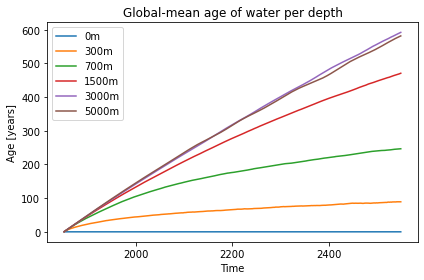

In [29]:
fig, ax = plt.subplots(1,1)

for depth in [0, 300, 700, 1500, 3000, 5000]:
    
    _da = (trage_global_mean.sel(deptht=depth, method='nearest') * 1/365.0)
    _da.plot(ax=ax, label='%dm' % (depth,))
    
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Age [years]')
ax.set_title('Global-mean age of water per depth')
fig.tight_layout()
fig.savefig('plots/global_mean_age.pdf',format='pdf')

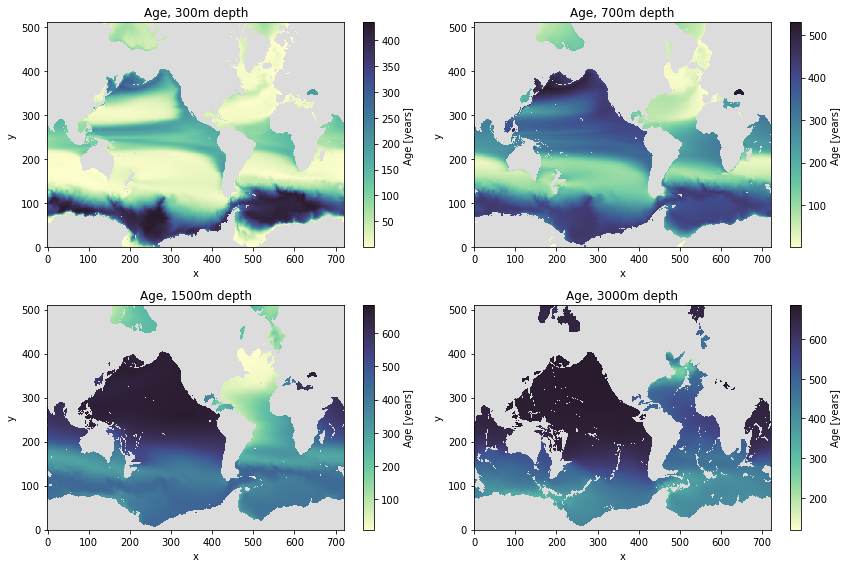

In [37]:
fig, ax = plt.subplots(2,2,figsize=(12,8))
axs = ax.flat

for j,dep in enumerate([300,700,1500,3000]):
    
    # Age in years for last 30 years
    _da = ds_top['votrcage'][-30:].sel(deptht=dep,method='nearest').mean('time') * 1.0/365
    
    # Mask out land
    _dam = _da.where(ds_top['tmask'][0].sel(deptht=dep,method='nearest') == 1)
    
    # Plot
    _dam.plot(ax=axs[j], 
              cmap=cmocean.cm.deep, 
              rasterized=True,
              cbar_kwargs={'label':'Age [years]'})
    
    axs[j].set_title('Age, %dm depth' % (dep,))
    
    axs[j].set_facecolor('Gainsboro')
    
fig.tight_layout()
fig.savefig('plots/equilibration_tracer_age.pdf',format='pdf')